In [69]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [70]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [71]:
NUM_CLASSES = 5

# 入力長

In [72]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [73]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [74]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [76]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [77]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 24)                792       
_________________________________________________________________
dropout_9 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                250       
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 55        
Total params: 1,097
Trainable params: 1,097
Non-trainable params: 0
_________________________________________________________________


In [78]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [79]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [80]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
35/35 [==============================] - 0s 4ms/step - loss: 1.6130 - accuracy: 0.3184 - val_loss: 1.5841 - val_accuracy: 0.3828

Epoch 00001: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 2/1000
35/35 [==============================] - 0s 1ms/step - loss: 1.5798 - accuracy: 0.3756 - val_loss: 1.5554 - val_accuracy: 0.4315

Epoch 00002: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 3/1000
35/35 [==============================] - 0s 1ms/step - loss: 1.5532 - accuracy: 0.3841 - val_loss: 1.5226 - val_accuracy: 0.4612

Epoch 00003: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 4/1000
35/35 [==============================] - 0s 1ms/step - loss: 1.5275 - accuracy: 0.3956 - val_loss: 1.4819 - val_accuracy: 0.4591

Epoch 00004: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 5/1000
35/35 [==============================] - 0s 1ms/step - 

35/35 [==============================] - 0s 1ms/step - loss: 0.8172 - accuracy: 0.7039 - val_loss: 0.5468 - val_accuracy: 0.8710

Epoch 00036: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 37/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.7832 - accuracy: 0.7158 - val_loss: 0.5368 - val_accuracy: 0.8758

Epoch 00037: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 38/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.7958 - accuracy: 0.7068 - val_loss: 0.5317 - val_accuracy: 0.8771

Epoch 00038: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 39/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.8080 - accuracy: 0.6965 - val_loss: 0.5260 - val_accuracy: 0.8805

Epoch 00039: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 40/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.7

35/35 [==============================] - 0s 1ms/step - loss: 0.7047 - accuracy: 0.7487 - val_loss: 0.4018 - val_accuracy: 0.9055

Epoch 00071: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 72/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.6868 - accuracy: 0.7501 - val_loss: 0.3979 - val_accuracy: 0.9055

Epoch 00072: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 73/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.6665 - accuracy: 0.7669 - val_loss: 0.3927 - val_accuracy: 0.9034

Epoch 00073: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 74/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.6747 - accuracy: 0.7602 - val_loss: 0.3921 - val_accuracy: 0.9034

Epoch 00074: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 75/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.6

35/35 [==============================] - 0s 1ms/step - loss: 0.6297 - accuracy: 0.7811 - val_loss: 0.3457 - val_accuracy: 0.9169

Epoch 00106: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 107/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.6318 - accuracy: 0.7741 - val_loss: 0.3405 - val_accuracy: 0.9190

Epoch 00107: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 108/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.6373 - accuracy: 0.7753 - val_loss: 0.3382 - val_accuracy: 0.9196

Epoch 00108: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 109/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.6484 - accuracy: 0.7721 - val_loss: 0.3385 - val_accuracy: 0.9190

Epoch 00109: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 110/1000
35/35 [==============================] - 0s 1ms/step - loss:

35/35 [==============================] - 0s 1ms/step - loss: 0.6087 - accuracy: 0.7856 - val_loss: 0.3177 - val_accuracy: 0.9183

Epoch 00141: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 142/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.6096 - accuracy: 0.7827 - val_loss: 0.3189 - val_accuracy: 0.9183

Epoch 00142: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 143/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.6133 - accuracy: 0.7829 - val_loss: 0.3176 - val_accuracy: 0.9196

Epoch 00143: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 144/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.6107 - accuracy: 0.7823 - val_loss: 0.3158 - val_accuracy: 0.9210

Epoch 00144: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 145/1000
35/35 [==============================] - 0s 1ms/step - loss:

35/35 [==============================] - 0s 1ms/step - loss: 0.5833 - accuracy: 0.7931 - val_loss: 0.2992 - val_accuracy: 0.9237

Epoch 00176: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 177/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.6076 - accuracy: 0.7892 - val_loss: 0.3035 - val_accuracy: 0.9210

Epoch 00177: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 178/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.6129 - accuracy: 0.7838 - val_loss: 0.3031 - val_accuracy: 0.9230

Epoch 00178: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 179/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5810 - accuracy: 0.7924 - val_loss: 0.3011 - val_accuracy: 0.9230

Epoch 00179: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 180/1000
35/35 [==============================] - 0s 1ms/step - loss:

35/35 [==============================] - 0s 1ms/step - loss: 0.5788 - accuracy: 0.7971 - val_loss: 0.2905 - val_accuracy: 0.9271

Epoch 00211: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 212/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5686 - accuracy: 0.8041 - val_loss: 0.2880 - val_accuracy: 0.9284

Epoch 00212: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 213/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5899 - accuracy: 0.7942 - val_loss: 0.2877 - val_accuracy: 0.9291

Epoch 00213: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 214/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5667 - accuracy: 0.8023 - val_loss: 0.2896 - val_accuracy: 0.9223

Epoch 00214: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 215/1000
35/35 [==============================] - 0s 1ms/step - loss:

35/35 [==============================] - 0s 1ms/step - loss: 0.5633 - accuracy: 0.8043 - val_loss: 0.2775 - val_accuracy: 0.9298

Epoch 00246: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 247/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5410 - accuracy: 0.8100 - val_loss: 0.2768 - val_accuracy: 0.9298

Epoch 00247: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 248/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5812 - accuracy: 0.7978 - val_loss: 0.2771 - val_accuracy: 0.9311

Epoch 00248: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 249/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5786 - accuracy: 0.8016 - val_loss: 0.2720 - val_accuracy: 0.9318

Epoch 00249: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 250/1000
35/35 [==============================] - 0s 1ms/step - loss:

Epoch 281/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5616 - accuracy: 0.7969 - val_loss: 0.2678 - val_accuracy: 0.9325

Epoch 00281: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 282/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5532 - accuracy: 0.8005 - val_loss: 0.2672 - val_accuracy: 0.9298

Epoch 00282: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 283/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5330 - accuracy: 0.8082 - val_loss: 0.2662 - val_accuracy: 0.9271

Epoch 00283: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 284/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5622 - accuracy: 0.7994 - val_loss: 0.2670 - val_accuracy: 0.9305

Epoch 00284: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 285/1000
35/35 [==============================] - 0s 1

Epoch 316/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5347 - accuracy: 0.8122 - val_loss: 0.2621 - val_accuracy: 0.9318

Epoch 00316: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 317/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5355 - accuracy: 0.8111 - val_loss: 0.2649 - val_accuracy: 0.9244

Epoch 00317: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 318/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5720 - accuracy: 0.8014 - val_loss: 0.2730 - val_accuracy: 0.9223

Epoch 00318: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 00318: early stopping


In [81]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [82]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[6.8497149e-14 7.0422208e-01 1.0322736e-02 2.7178237e-01 1.3672915e-02]
1


# 混同行列

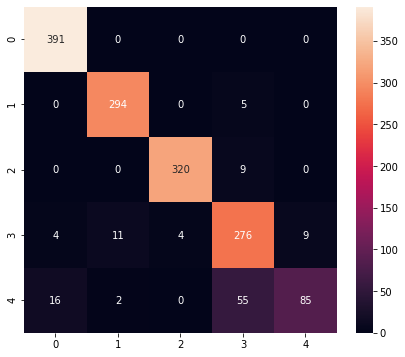

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       391
           1       0.96      0.98      0.97       299
           2       0.99      0.97      0.98       329
           3       0.80      0.91      0.85       304
           4       0.90      0.54      0.67       158

    accuracy                           0.92      1481
   macro avg       0.92      0.88      0.89      1481
weighted avg       0.92      0.92      0.92      1481



In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [84]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [85]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [86]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\offic\AppData\Local\Temp\tmpxip4m86y\assets


INFO:tensorflow:Assets written to: C:\Users\offic\AppData\Local\Temp\tmpxip4m86y\assets


6352

# 推論テスト

In [87]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [88]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'input_5', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [89]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [90]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [91]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.8497013e-14 7.0422208e-01 1.0322731e-02 2.7178237e-01 1.3672915e-02]
1
